<a href="https://colab.research.google.com/github/Ajitesh-Tamirisa/House-Price-Prediction/blob/main/STamirisa_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#**Importing dataset from Kaggle**
---



In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"sathyasaitamirisa","key":"72554b23d31247323c6c553873e18b63"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

ref                                                        title                                        size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
themrityunjaypathak/covid-cases-and-deaths-worldwide       Covid Cases and Deaths WorldWide              8KB  2023-02-01 12:22:51           9468        310  1.0              
datascientistanna/customers-dataset                        Shop Customer Data                           23KB  2023-02-07 18:42:21           7911        195  1.0              
amaanansari09/top-100-songs                                Top 100 songs                                 6KB  2023-02-16 18:55:35           2465         78  1.0              
justin2028/unemployment-in-america-per-us-state            Unemployment in America, Per US State       826KB  2023-03-02 07:2

In [ ]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

house-prices-advanced-regression-techniques.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
! mkdir house-prices-advanced-regression-techniques.zip
! unzip house-prices-advanced-regression-techniques.zip -d house-prices

mkdir: cannot create directory ‘house-prices-advanced-regression-techniques.zip’: File exists
Archive:  house-prices-advanced-regression-techniques.zip
replace house-prices/data_description.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: house-prices/data_description.txt  
replace house-prices/sample_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: house-prices/sample_submission.csv  
replace house-prices/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: house-prices/test.csv   
replace house-prices/train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: house-prices/train.csv  


# **EDA and Data preprocessing**
---



In [ ]:
df=pd.read_csv('house-prices/train.csv', index_col=0)
df.shape

(1460, 80)

In [ ]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


array([[<AxesSubplot:title={'center':'SalePrice'}>]], dtype=object)

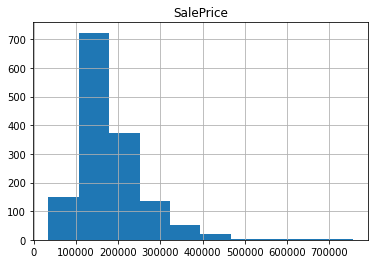

In [ ]:
df.hist(column='SalePrice')

In [ ]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [ ]:
#Printing non numeric variables
non_numeric_variables = []

for i in df.columns:
  if df[i].dtype==object:
    non_numeric_variables.append(i)
non_numeric_variables

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [ ]:
len(non_numeric_variables)

43

In [ ]:
for c in non_numeric_variables:
  print('-----------------------------------------')
  print(df[c].value_counts())

-----------------------------------------
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
-----------------------------------------
Pave    1454
Grvl       6
Name: Street, dtype: int64
-----------------------------------------
Grvl    50
Pave    41
Name: Alley, dtype: int64
-----------------------------------------
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
-----------------------------------------
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
-----------------------------------------
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
-----------------------------------------
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
-----------------------------------------
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
-----------------------------------------
NAmes      225
CollgCr 

In [ ]:
#Printing Numeric variables
numeric_variables = []

for i in df.columns:
  if ((df[i].dtype!=object) & (i!='SalePrice')):
    numeric_variables.append(i)
numeric_variables

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [ ]:
len(numeric_variables)

36

In [ ]:
correlationMatrix = df.corr()
correlationMatrix

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


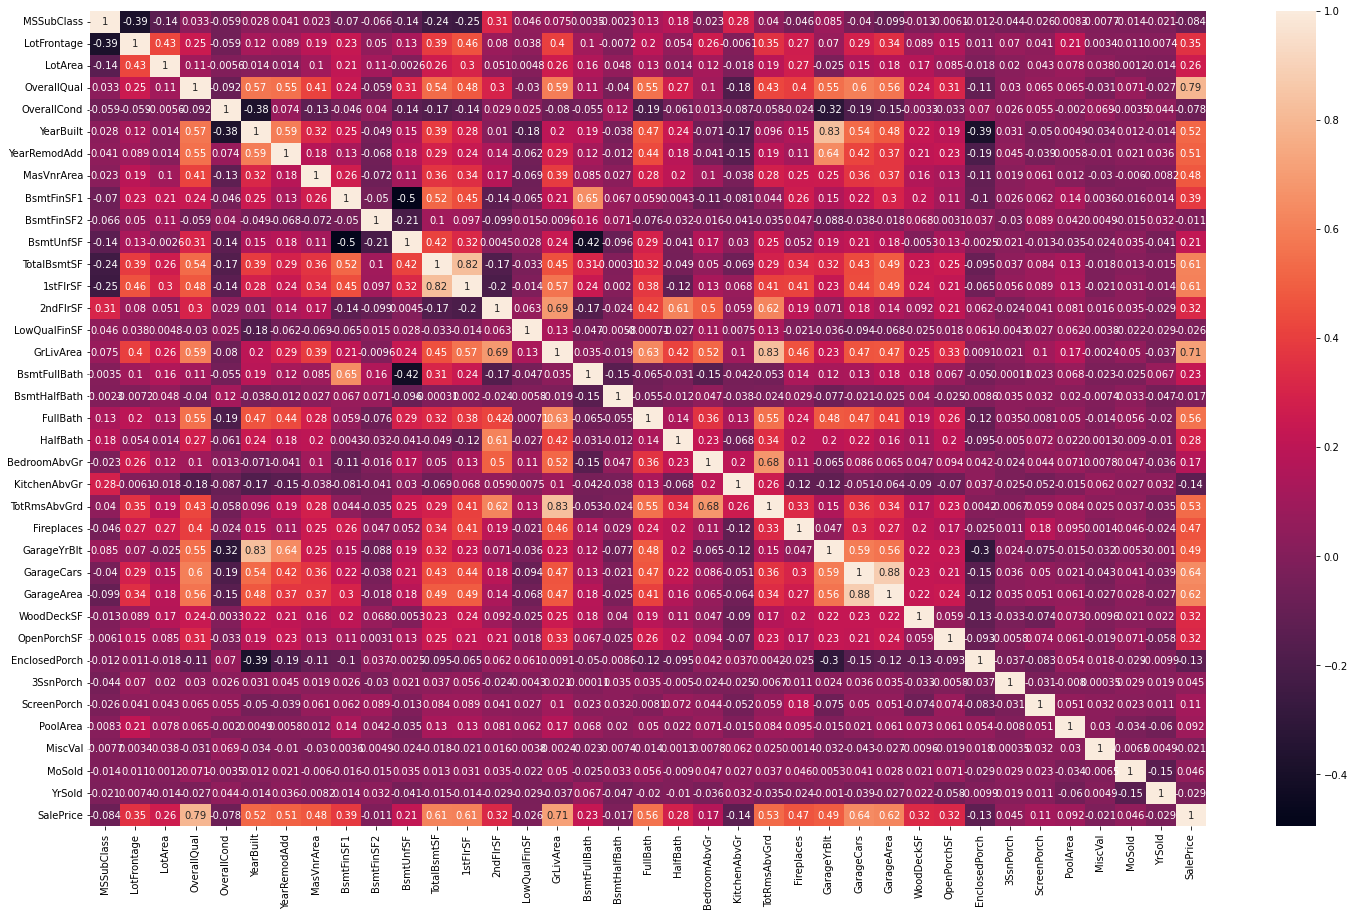

In [ ]:
#Heat map of Correlation matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.heatmap(correlationMatrix, vmax=1, annot=True);

In [ ]:
#Finding columns which have very high correlation with SalePrice column
colsSortedByCorr = df.corr()["SalePrice"].sort_values(ascending = False)
colsSortedByCorr

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

**Top Correlated features with SalePrice are:**

1.   OverallQual
2.   GrLivArea
3.   GarageCars
4.   GarageArea
5.   TotalBsmtSF
6.   1stFlrSF
7. FullBath
8. TotRmsAbvGrd
9. YearBuilt
10. YearRemodAdd


In [ ]:
correlationMatrix.index[((correlationMatrix["SalePrice"]>0.5) | (correlationMatrix["SalePrice"]<-0.5))]

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

The plot below shows the distribution of top correlated features and SalePrice:

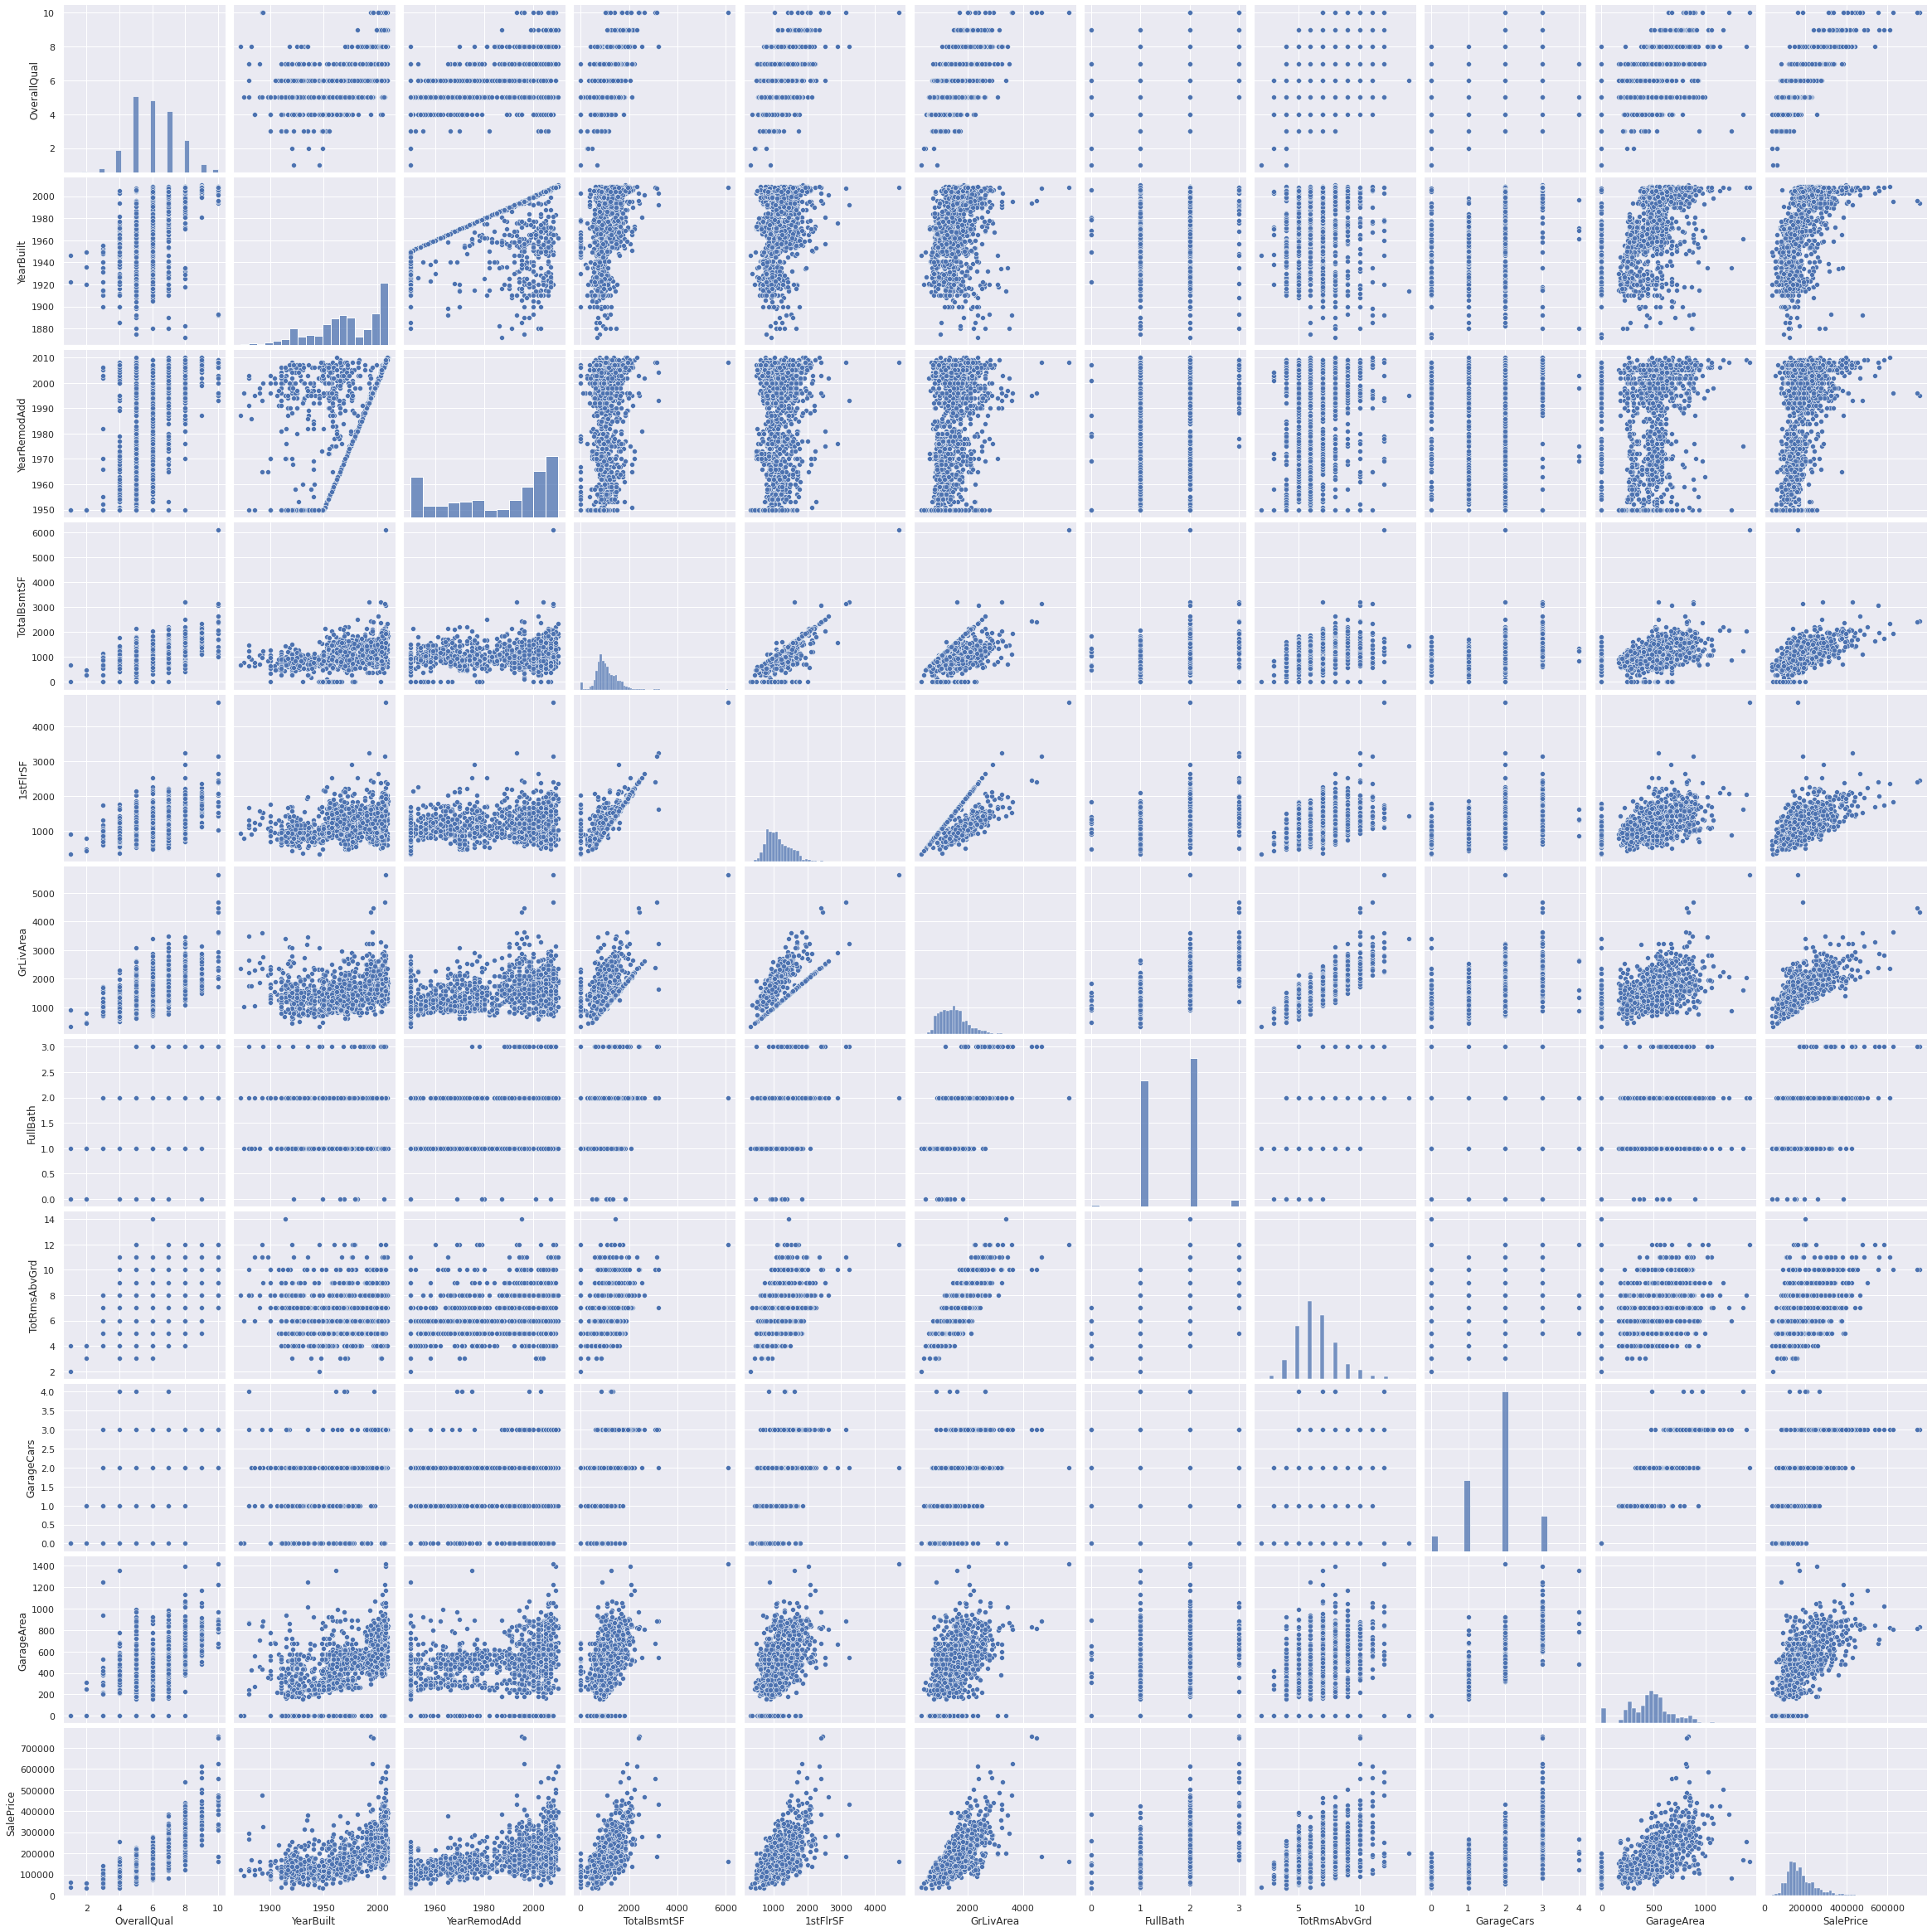

In [ ]:
sns.set()
topCorrelatedColumns = correlationMatrix.index[((correlationMatrix["SalePrice"]>0.5) | (correlationMatrix["SalePrice"]<-0.5))]
sns.pairplot(df[topCorrelatedColumns], height = 3)
plt.show();

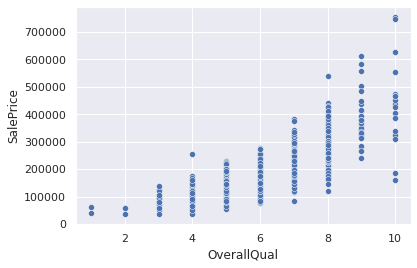

In [ ]:
sns.scatterplot(x = "OverallQual", y = "SalePrice", data = df);

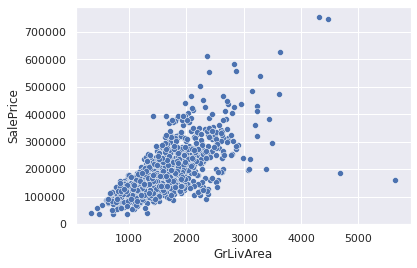

In [ ]:
sns.scatterplot(x = "GrLivArea", y = "SalePrice", data = df);

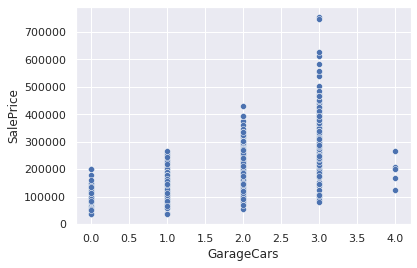

In [ ]:
sns.scatterplot(x = "GarageCars", y = "SalePrice", data = df);

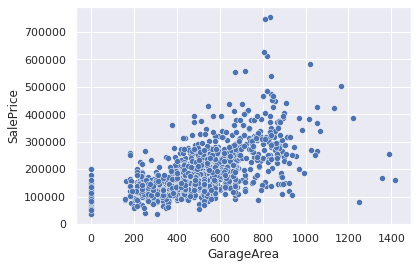

In [ ]:
sns.scatterplot(x = "GarageArea", y = "SalePrice", data = df);

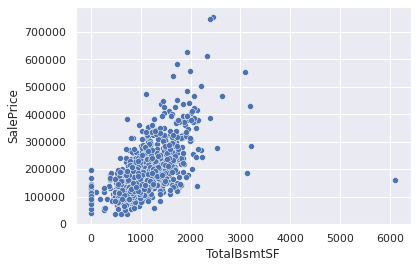

In [ ]:
sns.scatterplot(x = "TotalBsmtSF", y = "SalePrice", data = df);

From the graphs we can see and remove outliers for the top 5 correlated columns. Below code removes rows of data which are can be clearly identified as outliers based on the graphs above.

In [ ]:
df[(df["SalePrice"] < 200000) & (df["OverallQual"] > 8)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [ ]:
df[(df["SalePrice"] < 200000) & (df["GrLivArea"] > 4000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
524,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


Coincidentally, outliers of both the columns belong to the same rows. We can remove these rows from our data

In [ ]:
df[(df["SalePrice"] < 200000) & (df["TotalBsmtSF"] > 6000)]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1299,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [ ]:
df = df.drop(df[(df["SalePrice"] < 200000) & (df["OverallQual"] > 8)].index, axis = 0)

In [ ]:
#PRinting missing value count for each column with missing values
def countOfMissingValues(df):
  for i in df.columns:
    if df[i].isna().sum()>0:
      print(i+" - ",df[i].isna().sum())

countOfMissingValues(df)

LotFrontage -  259
Alley -  1367
MasVnrType -  8
MasVnrArea -  8
BsmtQual -  37
BsmtCond -  37
BsmtExposure -  38
BsmtFinType1 -  37
BsmtFinType2 -  38
Electrical -  1
FireplaceQu -  690
GarageType -  81
GarageYrBlt -  81
GarageFinish -  81
GarageQual -  81
GarageCond -  81
PoolQC -  1452
Fence -  1177
MiscFeature -  1404


Replacing missing values in Numeric columns with median

In [ ]:
def replaceNumericMissingValues(data):
    values = {}
    for a in numeric_variables:
        values[a] = data[a].median()
    data.fillna(value=values,inplace=True)

replaceNumericMissingValues(df)
countOfMissingValues(df)

Alley -  1367
MasVnrType -  8
BsmtQual -  37
BsmtCond -  37
BsmtExposure -  38
BsmtFinType1 -  37
BsmtFinType2 -  38
Electrical -  1
FireplaceQu -  690
GarageType -  81
GarageFinish -  81
GarageQual -  81
GarageCond -  81
PoolQC -  1452
Fence -  1177
MiscFeature -  1404


Missing Values of 3 Numeric columns have been filled.

In [ ]:
def replaceNonNumericMissingValues(data):
    values = {}
    for a in non_numeric_variables:
        values[a] = 'Unknown'

    data.fillna(value=values,inplace=True)

replaceNonNumericMissingValues(df)
countOfMissingValues(df)

Nothing is printed. This means that missing values of all columns have been filled.

**Encoding Non-numeric Variables**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
#Performing Label encoding on all categorical variables
def encodeCategoricalData(df):
  for c in non_numeric_variables:
    labelEncoder = LabelEncoder()
    labelEncoder = labelEncoder.fit_transform(df[c])
    df[c] = labelEncoder

encodeCategoricalData(df)

df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,208500
2,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,181500
3,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,223500
4,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,140000
5,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,250000


# **Splitting train data: into train and test to see the performance of our model**

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
X = df.drop('SalePrice', axis=1)
Y = df['SalePrice']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# **Fitting Linear Regression Model**

---



In [ ]:
linreg = LinearRegression()

# fit the model to the training data
model = linreg.fit(X_train, y_train)

In [ ]:
print(linreg.intercept_)
print(linreg.coef_)

1227085.3853334337
[-7.30350871e+01 -1.28020371e+03  5.35968644e+01  5.74448737e-01
  3.85258160e+04  4.40947786e+03 -3.61302754e+02 -1.19934310e+03
 -3.49379931e+04 -2.30037454e+02 -5.51467944e+03  1.75000608e+01
 -2.22047522e+02 -1.46350052e+03 -1.11609640e+03  5.89975852e+02
  8.27962629e+03  5.82156596e+03  2.49620441e+02  6.47585282e+00
  5.02239619e+02  3.85423498e+03 -1.36681458e+03  8.52720206e+02
  6.61158065e+03  3.28243716e+01 -1.16014592e+04  1.03716020e+03
  1.51148816e+03 -4.54323760e+03  2.43354493e+03 -1.99830022e+03
  1.78644323e+03  2.15014985e+01  1.04894870e+03  9.91172462e+00
 -6.78883019e+00  2.46243928e+01 -1.95787174e+03 -5.97742213e+02
  5.03552375e+02 -6.32663402e+02  3.08684959e+01  3.34948239e+01
 -2.94030408e+01  3.49602787e+01  1.84840394e+03 -1.91016238e+03
 -2.29292426e+03 -4.05261010e+03 -6.22221636e+03 -1.74286483e+04
 -7.95440042e+03  3.40483233e+02  3.76263635e+03  1.19300025e+03
 -6.80775286e+02  1.72393809e+03  3.76704656e+01  5.96400879e+02
  6.95

In [ ]:
print("R-Square : " ,linreg.score(X_test,y_test))

R-Square :  0.8911186966616167


Since the R-sqaure value is high we can go with linear regression

In [ ]:
X = df.drop('SalePrice', axis=1)
Y = df['SalePrice']
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,1,2,3,3,0,4,...,0,0,3,4,4,0,2,2008,8,4
2,20,3,80.0,9600,1,2,3,3,0,2,...,0,0,3,4,4,0,5,2007,8,4
3,60,3,68.0,11250,1,2,0,3,0,4,...,0,0,3,4,4,0,9,2008,8,4
4,70,3,60.0,9550,1,2,0,3,0,0,...,0,0,3,4,4,0,2,2006,8,0
5,60,3,84.0,14260,1,2,0,3,0,2,...,0,0,3,4,4,0,12,2008,8,4


In [ ]:
Y.head()

Id
1    208500
2    181500
3    223500
4    140000
5    250000
Name: SalePrice, dtype: int64

In [ ]:
model = linreg.fit(X, Y)

In [ ]:
print(model.intercept_)
print(model.coef_)

1368608.1968637812
[-7.33635884e+01 -7.60957883e+02  6.83972247e+01  6.00547782e-01
  3.91452493e+04  3.80918382e+03 -3.65834969e+02 -1.21865918e+03
 -3.94318508e+04 -5.82721554e+00 -4.32037320e+03  6.51405768e+01
 -4.89394311e+02 -2.44563884e+03 -1.52676495e+03  1.87758250e+02
  8.33237467e+03  5.46607210e+03  2.58341281e+02  2.97364888e+01
  1.11889027e+03  1.73132026e+03 -1.19500845e+03  5.69680592e+02
  7.02945444e+03  3.48043218e+01 -1.10313164e+04  6.57310509e+02
  1.66018582e+03 -6.27579441e+03  2.95734652e+03 -2.28029919e+03
  1.08054089e+03  1.85179758e+01  9.02071613e+02  7.82687890e+00
 -6.12952685e+00  2.02153281e+01 -9.18590266e+02 -7.12179351e+02
  5.05196689e+01 -6.28691506e+02  3.26737680e+01  2.89630333e+01
 -2.71350710e+01  3.45017297e+01  6.19150051e+02 -9.07614880e+02
 -5.45991022e+02 -8.74249494e+02 -7.02977292e+03 -1.87851000e+04
 -7.19103346e+03  1.53925942e+03  4.66249529e+03  1.62537166e+03
 -4.20706561e+02  1.93486061e+03 -7.22090083e+00  5.76005483e+02
  5.10

In [ ]:
coefficients = pd.DataFrame({"Feature":X.columns.tolist(),"Coefficients":model.coef_})
coefficients = coefficients.sort_values('Coefficients')
coefficients

,Feature,Coefficients
8,Utilities,-39431.850848
71,PoolQC,-21521.001948
51,KitchenAbvGr,-18785.099981
26,ExterQual,-11031.316437
52,KitchenQual,-7191.033462
...,...,...
60,GarageCars,5104.325308
17,OverallCond,5466.072104
24,MasVnrType,7029.454442
16,OverallQual,8332.374669


# **Understanding the encoded values of variables**

---



CHecking encoded value for **BrkCmn** value in **MasVnrType**

In [ ]:
newdf=pd.read_csv('house-prices/train.csv', index_col=0)
newdfMasVnrTypeBrkCmn = newdf[newdf['MasVnrType'] == 'BrkCmn']
newdfMasVnrTypeBrkCmn['MasVnrType'].head()

Id
84     BrkCmn
92     BrkCmn
174    BrkCmn
250    BrkCmn
274    BrkCmn
Name: MasVnrType, dtype: object

In [ ]:
df.iloc[[83]].MasVnrType

Id
84    0
Name: MasVnrType, dtype: int64

Encoded value for **BrkCmn** is **0**

CHecking encoded value for **BrkFace** value in **MasVnrType**

In [ ]:
newdf=pd.read_csv('house-prices/train.csv', index_col=0)

In [ ]:
newdfMasVnrTypeBrkCmn = newdf[newdf['MasVnrType'] == 'BrkFace']
newdfMasVnrTypeBrkCmn['MasVnrType'].head()

Id
1     BrkFace
3     BrkFace
5     BrkFace
15    BrkFace
17    BrkFace
Name: MasVnrType, dtype: object

In [ ]:
df.iloc[[0]].MasVnrType

Id
1    1
Name: MasVnrType, dtype: int64

Encoded value for **BrkFace** is **1**

Checking encoded value for **Stone**

In [ ]:
newdf=pd.read_csv('house-prices/train.csv', index_col=0)
newdfMasVnrTypeBrkCmn = newdf[newdf['MasVnrType'] == 'Stone']
newdfMasVnrTypeBrkCmn['MasVnrType'].head()

Id
7     Stone
8     Stone
12    Stone
14    Stone
26    Stone
Name: MasVnrType, dtype: object

In [ ]:
df.iloc[[6]].MasVnrType

Id
7    3
Name: MasVnrType, dtype: int64

Encoded value for **Stone** is 3

In [ ]:
newdf=pd.read_csv('house-prices/train.csv', index_col=0)
newdfMasVnrTypeBrkCmn = newdf[newdf['MasVnrType'] == 'None']
newdfMasVnrTypeBrkCmn['MasVnrType'].head()

Id
2     None
4     None
6     None
9     None
10    None
Name: MasVnrType, dtype: object

In [ ]:
df.iloc[[1]].MasVnrType

Id
2    2
Name: MasVnrType, dtype: int64

Encoded value for **None** is **2**

# **Reflection on Linear Regression Model**

---



According to the linear regression model, columns which have the **highest positive correlation** to **SalePrice** are:

1.   **Street** - Houses with Paved streets(numeric encoded value = 1) have higher SalePrice compared to ones with Gravel
2.   **OverallQual** - As overall quality value increases (i.e. goes from 1 to 10), SalePrice increases
3.   **MasVnrType** - Houses with Stone Masonry veneer type have higher SalePrice while ones with BrkCmn have lower SalePrice
4.   **OverallCond** - As overall condition value increases (i.e. goes from 1 to 10), SalePrice increases
5.   **GarageCars** - Higher the car capacity in garage increases, Higher the Sale Price

According to the linear regression model, columns which have the **highest negative correlation** to **SalePrice** are:


1.   **Utilities** - Houses with All public utilities (numeric encoded value - 0) have higher SalePrice compared to ones with electricity only
2.   **PoolQC** - Houses with pool quality excellent have higher SalePrice
3. **KitchenAbvGr**
4. **ExterQual**
5. **KitchenQual**




# **Predicting values of SalePrice for test data**

---



In [ ]:
df_test = pd.read_csv('house-prices/test.csv')
df_test_ids = df_test['Id']
df_test = df_test.drop('Id', axis=1)
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [ ]:
countOfMissingValues(df_test)

MSZoning -  4
LotFrontage -  227
Alley -  1352
Utilities -  2
Exterior1st -  1
Exterior2nd -  1
MasVnrType -  16
MasVnrArea -  15
BsmtQual -  44
BsmtCond -  45
BsmtExposure -  44
BsmtFinType1 -  42
BsmtFinSF1 -  1
BsmtFinType2 -  42
BsmtFinSF2 -  1
BsmtUnfSF -  1
TotalBsmtSF -  1
BsmtFullBath -  2
BsmtHalfBath -  2
KitchenQual -  1
Functional -  2
FireplaceQu -  730
GarageType -  76
GarageYrBlt -  78
GarageFinish -  78
GarageCars -  1
GarageArea -  1
GarageQual -  78
GarageCond -  78
PoolQC -  1456
Fence -  1169
MiscFeature -  1408
SaleType -  1


In [ ]:
replaceNumericMissingValues(df_test)
countOfMissingValues(df_test)

MSZoning -  4
Alley -  1352
Utilities -  2
Exterior1st -  1
Exterior2nd -  1
MasVnrType -  16
BsmtQual -  44
BsmtCond -  45
BsmtExposure -  44
BsmtFinType1 -  42
BsmtFinType2 -  42
KitchenQual -  1
Functional -  2
FireplaceQu -  730
GarageType -  76
GarageFinish -  78
GarageQual -  78
GarageCond -  78
PoolQC -  1456
Fence -  1169
MiscFeature -  1408
SaleType -  1


In [ ]:
replaceNonNumericMissingValues(df_test)
countOfMissingValues(df_test)

In [ ]:
encodeCategoricalData(df_test)
df_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,2,3,3,0,4,...,120,0,2,2,3,0,6,2010,9,4
1,20,3,81.0,14267,1,2,0,3,0,0,...,0,0,2,4,0,12500,6,2010,9,4
2,60,3,74.0,13830,1,2,0,3,0,4,...,0,0,2,2,3,0,3,2010,9,4
3,60,3,78.0,9978,1,2,0,3,0,4,...,0,0,2,4,3,0,6,2010,9,4
4,120,3,43.0,5005,1,2,0,1,0,4,...,144,0,2,4,3,0,1,2010,9,4


In [ ]:
predictions = model.predict(df_test)
predictions

array([140148.43117026, 182505.4793574 , 200706.88598642, ...,
       193973.47806964, 151139.26767208, 253218.74019302])

In [ ]:
predictions = pd.DataFrame({'Id': df_test_ids, 'SalePrice': predictions})
predictions = predictions.set_index('Id')
predictions

,SalePrice
Id,
1461,140148.431170
1462,182505.479357
1463,200706.885986
1464,207179.232620
1465,208410.603638
...,...
2915,105369.637169
2916,86024.401551
2917,193973.478070


In [ ]:
predictions.to_csv('HousePrices.csv')